<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

# load train and test data
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

# preprocess data
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels_original, num_classes=10) 
test_labels = to_categorical(test_labels_original, num_classes=10)

# set up layers
model = keras.Sequential([
    keras.layers.Dense(10, input_dim=784, activation=tf.nn.softmax)
])

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# compile the model
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 65us/step - loss: 0.4173 - acc: 0.8854 - val_loss: 0.3135 - val_acc: 0.9130
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.3133 - acc: 0.9115 - val_loss: 0.2923 - val_acc: 0.9155
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.2966 - acc: 0.9164 - val_loss: 0.2813 - val_acc: 0.9197
Epoch 4/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.2872 - acc: 0.9196 - val_loss: 0.2763 - val_acc: 0.9232
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2812 - acc: 0.9216 - val_loss: 0.2775 - val_acc: 0.9225
Epoch 6/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2772 - acc: 0.9225 - val_loss: 0.2761 - val_acc: 0.9210
Epoch 7/

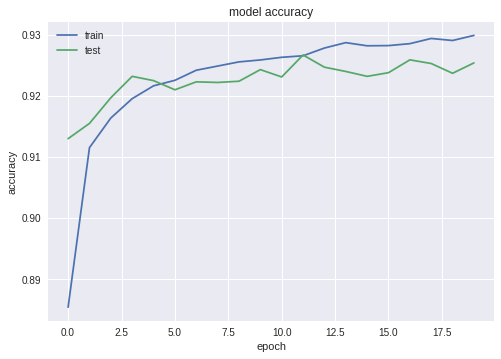

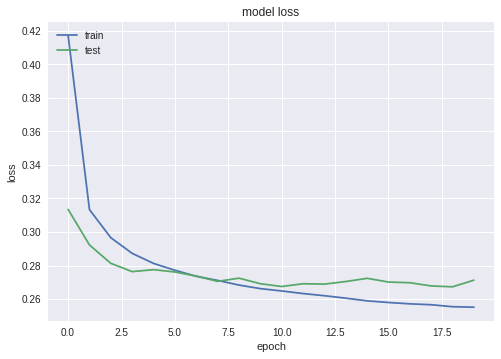

In [2]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()